In [1]:
s = [[2.0], [2.0, 6.0], [2.0, 6.0, 10.0], [2.0, 6.0, 10.0, 14.0], [2.0, 6.0, 10.0, 14.0, 18.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0, 42.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0, 42.0, 46.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0, 42.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0], [2.0, 6.0, 10.0, 14.0, 18.0], [2.0, 6.0, 10.0, 14.0], [2.0, 6.0, 10.0], [2.0, 6.0], [2.0], [4.0], [4.0, 8.0], [4.0, 8.0, 12.0], [4.0, 8.0, 12.0, 16.0], [4.0, 8.0, 12.0, 16.0, 20.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0, 44.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0, 44.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0], [4.0, 8.0, 12.0, 16.0, 20.0], [4.0, 8.0, 12.0, 16.0], [4.0, 8.0, 12.0], [4.0, 8.0], [4.0]]
print(len(s))

45


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.fft import rfft, rfftfreq

srcDictFile = "tmp/gatherdata/srcdata.json"
traceDictFile = "tmp/gatherdata/trcdata.json"

gatherDict_f = open(srcDictFile, "r")
traceDict_f = open(traceDictFile, "r")
gatherDict = json.load(gatherDict_f)["gather_dict"]
traceDict  = json.load(traceDict_f)["TraceData"]

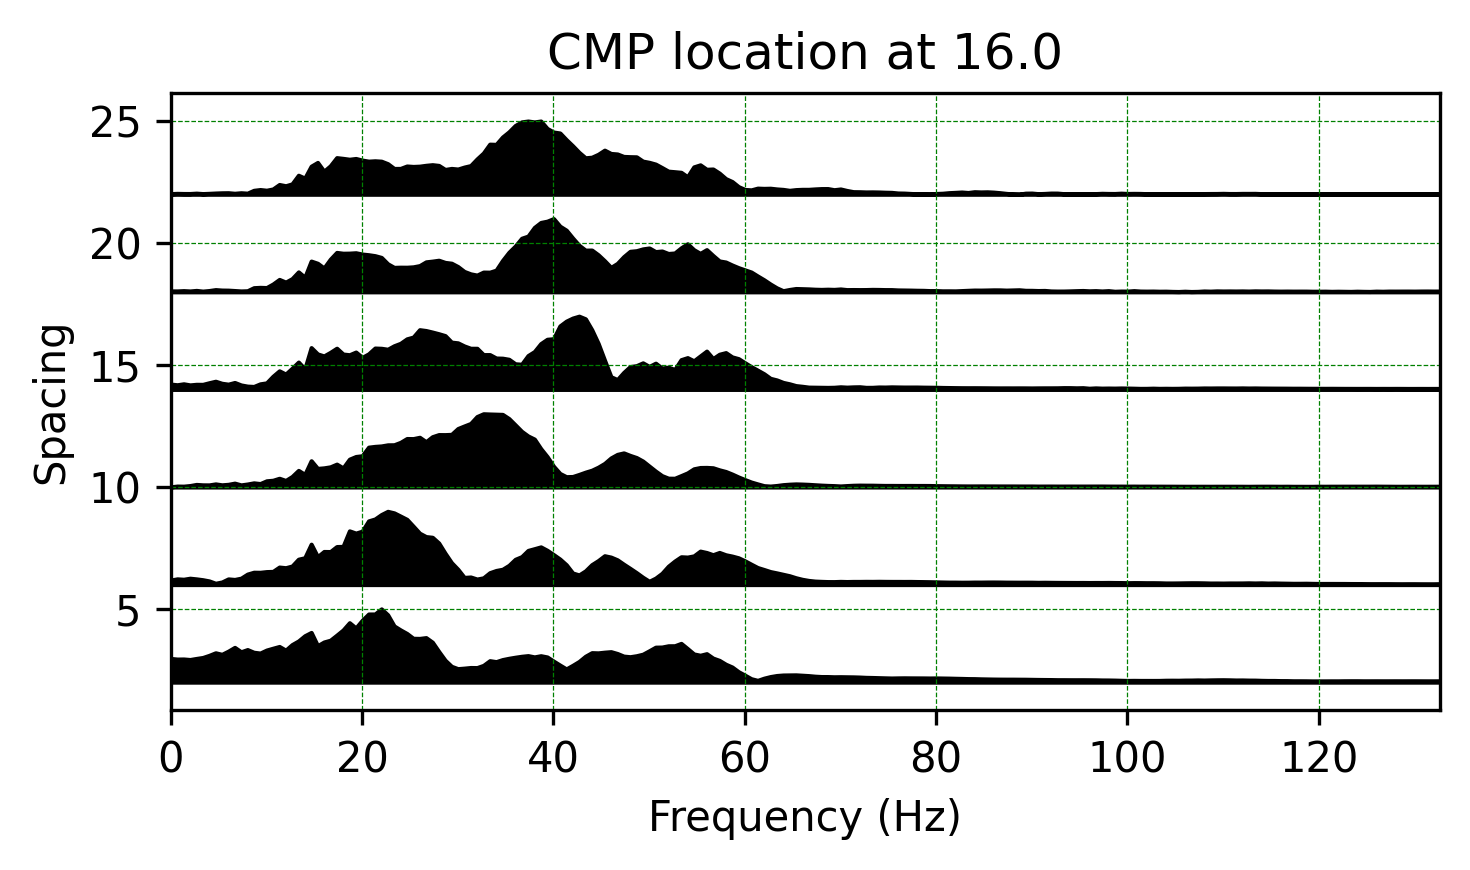

In [20]:
ampfactor = 3
t = np.arange(0, 1500*0.001 , 0.001)

fig, ax = plt.subplots(figsize=(5,3), dpi=300)

            
rcvrs = gatherDict["16.0"]
for k in range(len(rcvrs)):
    traceData = np.array(traceDict[5][k])     
    ffttraceData = rfft(traceData)
    ffttraceDataMeg = abs(ffttraceData)[:200]
    
    freqx = rfftfreq(traceData.size, 0.001)[:200]          
    ffttraceDataMeg = (ampfactor * ffttraceDataMeg / max(ffttraceDataMeg)) + rcvrs[k]
    ax.fill_between(freqx, rcvrs[k], y2=ffttraceDataMeg, where=ffttraceDataMeg>rcvrs[k], interpolate=True, color="black")
    ax.grid(linestyle="--", linewidth="0.3", color="g")
    ax.set_xlim([np.min(freqx), np.max(freqx)])

labels = ["Spacing", "CMP location at ", "/cmpcc-"]
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel(labels[0])
ax.set_title(labels[1]+str("16.0"))
plt.tight_layout()
plt.show()

In [18]:
print(freqx.size)

751


In [19]:
print(1500/2)

750.0
